In [293]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

supermar = pd.read_csv(r'/Users/jaimesastrecrespo/DAFT_1022/module_2/Project_Week_5/supermarket_sales - Sheet1.csv')
supermar.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [294]:
import numpy as np

In [295]:
supermar.shape

(1000, 17)

In [296]:
#finding duplicates rows
supermar.duplicated().sum()

0

In [297]:
profile = ProfileReport(supermar, title='Supermarket sales', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [298]:
supermar.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [299]:
# show null/NA values per column
supermar.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [300]:
corr = supermar.corr()
corr.style.background_gradient (cmap = 'coolwarm')

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [301]:
#checking columns tax and gross income if they're the same to drop the column gross income
df = supermar['Tax 5%'] == supermar['gross income']
df.value_counts()

True    1000
dtype: int64

In [302]:
del supermar['gross margin percentage']

In [303]:
supermar.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross income  Rating  
0  13:08      Ewallet  522.83       26.1415     9.1  
1  10:29         Cash   76.40        3.8200     9.6  
2  13:23  Credit card  324.31       16.2155     7.4  
3  20:33      Ewallet  465.76       23.2880     8.4  
4  10:37      Ewallet  604.17       30.2085     5.3

In [304]:
supermar.shape

(1000, 16)

In [305]:
corr = supermar.corr()
corr.style.background_gradient (cmap = 'coolwarm')

In [306]:
# Creating two new columns from day name and month to see the trends during the week adn to know the months where the sales happened.
supermar['Month_day'] = supermar['Date']
supermar['Date'] = \
supermar['day_name'] = pd.to_datetime(supermar['Date']).dt.day_name()
del supermar['Date']


In [307]:
supermar['Time'] = pd.to_datetime(supermar['Time'])
supermar['Hour'] = (supermar['Time']).dt.hour
supermar['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [308]:
supermar.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross income', 'Rating', 'Month_day', 'day_name',
       'Hour'],
      dtype='object')

In [310]:
supermar.rename(columns={'Invoice ID':'invoice_id'}, inplace=True)
supermar.rename(columns={'Branch':'branch'}, inplace=True)
supermar.rename(columns={'City':'city'}, inplace=True)
supermar.rename(columns={'Customer type':'customer_type'}, inplace=True)
supermar.rename(columns={'Gender':'gender'}, inplace=True)
supermar.rename(columns={'Product line':'product_line'}, inplace=True)
supermar.rename(columns={'Unit price':'unit_price'}, inplace=True)
supermar.rename(columns={'Quantity':'quantity'}, inplace=True)
supermar.rename(columns={'Tax 5%':'tax5'}, inplace=True)
supermar.rename(columns={'Total':'total'}, inplace=True)
supermar.rename(columns={'Time':'time'}, inplace=True)
supermar.rename(columns={'Payment':'payment'}, inplace=True)
supermar.rename(columns={'gross income':'gross_income'}, inplace=True)

In [311]:
supermar['month'] = pd.to_datetime(supermar['Month_day']).dt.month_name()

In [335]:
supermar.head()

invoice_id branch       city customer_type  gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             product_line  unit_price  quantity     tax5     total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

                 time      payment    cogs  gross_income  Rating  Month_day  \
0 2022-11-11 13:08:00      Ewallet  522.83       26.1415     9.1   1/5/2019   
1 2022-11-11 10:29:00         Cash   76.40        3.8200     9.6   3/8/2019   
2 2022-11-11 13:23:00  Credit card  324.31       16.2155     7.4   3/3/2019   
3 2022-11-11 20:33:00      Ewallet  465.76       23.2880     8.4  1/27/2019   
4 2022-11-11 10:37:00      Ewallet  604.17       30.2085     5.3   2/8/2019   

   day_name  Hour     month  
0  Saturday    13   January  
1    Friday    10     March  
2    Sunday    13     March  
3    Sunday    20   January  
4    Friday    10  February

In [313]:
supermar.to_csv(r'supermar_clean.csv')

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


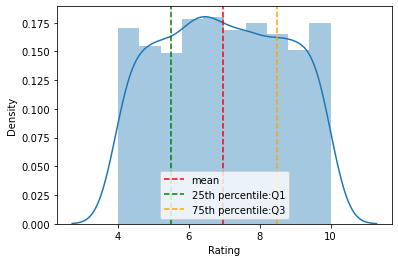

In [314]:
### Fig 1: Distribution of Rating 
###  What does the customer rating look like and is it skewed?

sns.distplot(supermar['Rating'])
plt.axvline(x=np.mean(supermar['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(supermar['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(supermar['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th percentiles respectively.The mean rating is ~7 across products.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

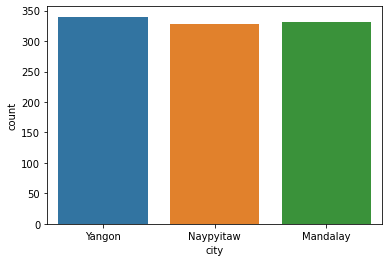

In [316]:
### Is there any difference in aggregate sales across branches?
sns.countplot(supermar['city'])
supermar['city'].value_counts()


There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


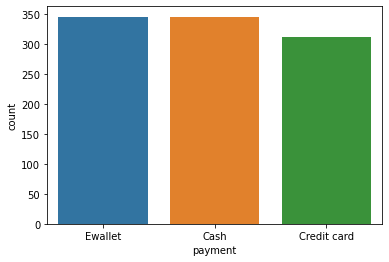

In [317]:
# most populer payment method

sns.countplot(supermar['payment']);

The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


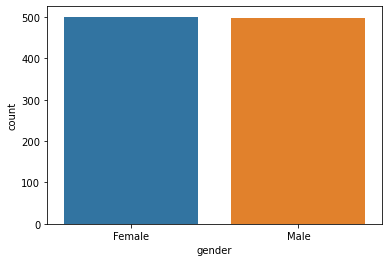

In [318]:
# most populer gender 

sns.countplot(supermar['gender']);

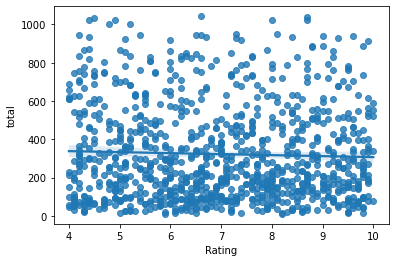

In [319]:
### Does Total affect the ratings that the customers provide?

sns.regplot(x="Rating",
            y="total", 
            data=supermar);

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between Total spending per ticket and his rating.

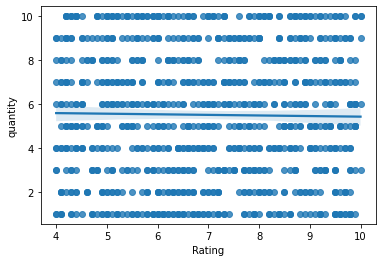

In [320]:
### Does quantity affect the ratings that the customers provide?

sns.regplot(x="Rating",
            y="quantity", 
            data=supermar);

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between quantity of ticket and his rating.

<AxesSubplot:xlabel='city', ylabel='gross_income'>

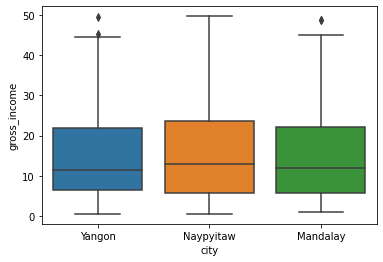

In [322]:
# Which city is the most profitable?

sns.boxplot(x=supermar['city'], y=supermar['gross_income'])

Naypyitaw is the most profitable branch in terms of gross income even if there are not a big difference between them.

<AxesSubplot:xlabel='gender', ylabel='gross_income'>

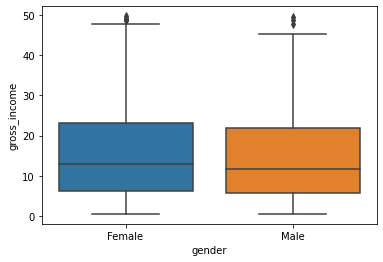

In [323]:
sns.boxplot(x=supermar['gender'], y=supermar['gross_income'])

Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

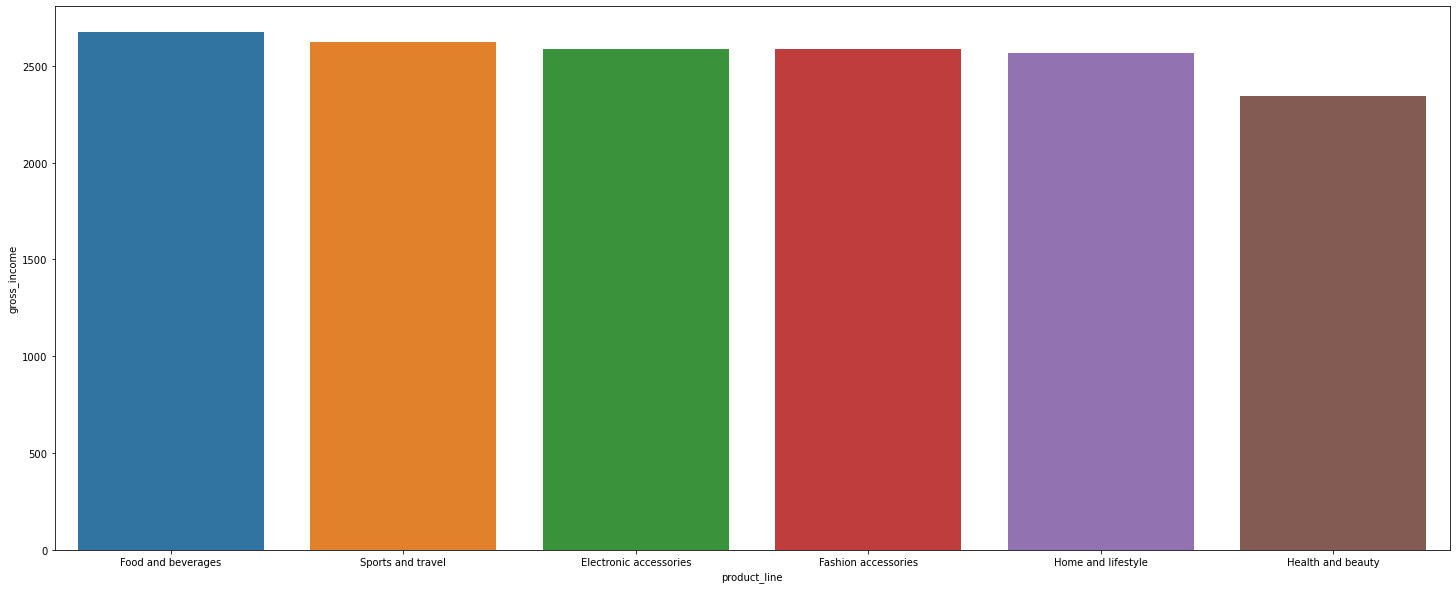

In [325]:
## Which product line generates most income?

cat=supermar[["product_line", "gross_income"]].groupby(['product_line'], as_index=False).sum().sort_values(by='gross_income', ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x='product_line', y='gross_income', data=cat);

Gross income is highest in food and beverages.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


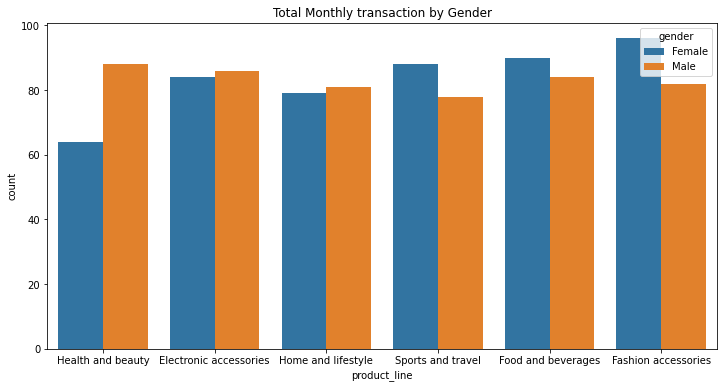

In [327]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(supermar['product_line'], hue = supermar.gender);

Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


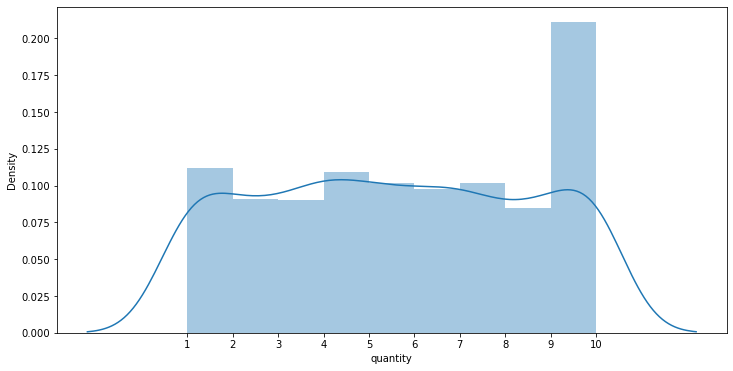

In [328]:
## How many products are bought by customers?

xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6));
sns.distplot(supermar['quantity']);
plt.xticks(xdata);

Most of the customers buy 10 quantities.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='day_name', ylabel='count'>

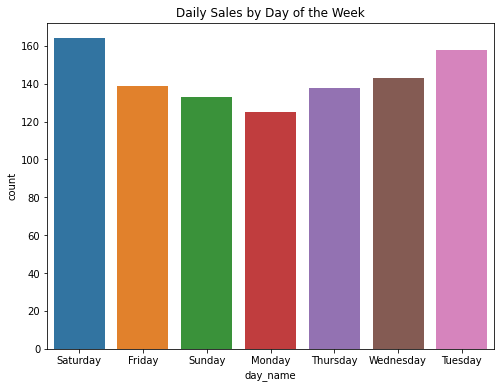

In [329]:
# Which day of the week has maximum sales?
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(supermar['day_name'])

In [ ]:
 ## Which hour of the day is the busiest?



Text(0.5, 1.0, 'Product Sales per Hour')

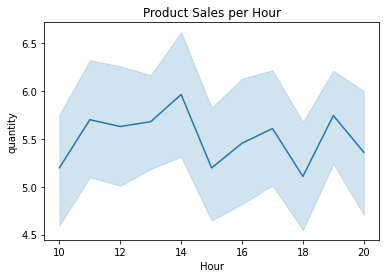

In [331]:
sns.lineplot(x="Hour",  y = 'quantity',data =supermar).set_title("Product Sales per Hour")

Peak is observed in the 14th hour i.e 2 pm of the day. Hence, sales is typically higher in the afternoons.

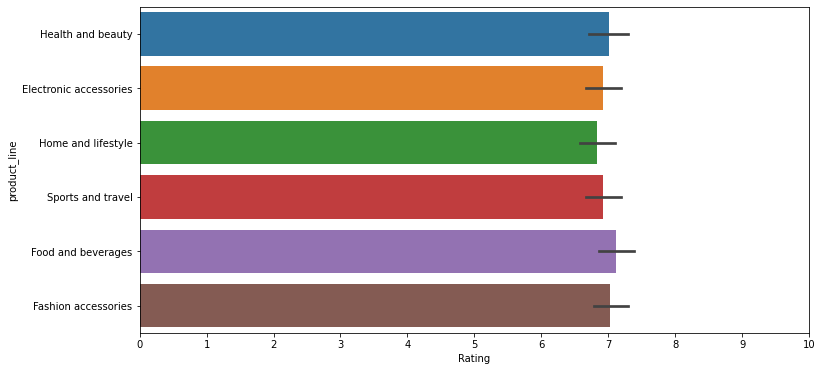

In [332]:
#Which product line should the supermarket focus on?
#### To answer this question, let us look at 2 graphs below:

xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = supermar['product_line'], x = supermar['Rating'])
plt.xticks(xdata);

<AxesSubplot:xlabel='quantity', ylabel='product_line'>

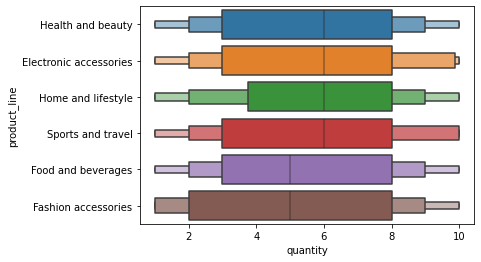

In [334]:
sns.boxenplot(y = 'product_line', x = 'quantity', data=supermar )

Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but quantity purchased is low. Hence, supply for these products need to be increased.

In [336]:

df2 = supermar.loc[supermar['day_name'].isin(['Tuesday'])]

In [337]:
df2

invoice_id branch       city customer_type  gender  \
12   365-64-0515      A     Yangon        Normal  Female   
15   299-46-1805      B   Mandalay        Member  Female   
17   765-26-6951      A     Yangon        Normal    Male   
21   371-85-5789      B   Mandalay        Normal    Male   
37   272-65-1806      A     Yangon        Normal  Female   
..           ...    ...        ...           ...     ...   
961  324-92-3863      A     Yangon        Member    Male   
962  593-08-5916      A     Yangon        Normal  Female   
970  746-04-1077      B   Mandalay        Member  Female   
977  518-71-6847      B   Mandalay        Member    Male   
995  233-67-5758      C  Naypyitaw        Normal    Male   

               product_line  unit_price  quantity     tax5     total  \
12   Electronic accessories       46.95         5  11.7375  246.4875   
15        Sports and travel       93.72         6  28.1160  590.4360   
17        Sports and travel       72.61         6  21.7830  457.4430   
21        Health and beauty       87.98         3  13.1970  277.1370   
37   Electronic accessories       60.88         9  27.3960  575.3160   
..                      ...         ...       ...      ...       ...   
961  Electronic accessories       20.89         2   2.0890   43.8690   
962     Fashion accessories       15.50         1   0.7750   16.2750   
970      Food and beverages       84.63        10  42.3150  888.6150   
977      Food and beverages       26.60         6   7.9800  167.5800   
995       Health and beauty       40.35         1   2.0175   42.3675   

                   time      payment    cogs  gross_income  Rating  Month_day  \
12  2022-11-11 10:25:00      Ewallet  234.75       11.7375     7.1  2/12/2019   
15  2022-11-11 16:19:00         Cash  562.32       28.1160     4.5  1/15/2019   
17  2022-11-11 10:39:00  Credit card  435.66       21.7830     6.9   1/1/2019   
21  2022-11-11 10:40:00      Ewallet  263.94       13.1970     5.1   3/5/2019   
37  2022-11-11 17:17:00      Ewallet  547.92       27.3960     4.7  1/15/2019   
..                  ...          ...     ...           ...     ...        ...   
961 2022-11-11 18:45:00         Cash   41.78        2.0890     9.8   2/5/2019   
962 2022-11-11 15:23:00  Credit card   15.50        0.7750     7.4  3/19/2019   
970 2022-11-11 11:36:00  Credit card  846.30       42.3150     9.0   1/1/2019   
977 2022-11-11 15:10:00      Ewallet  159.60        7.9800     4.9  2/26/2019   
995 2022-11-11 13:46:00      Ewallet   40.35        2.0175     6.2  1/29/2019   

    day_name  Hour     month  
12   Tuesday    10  February  
15   Tuesday    16   January  
17   Tuesday    10   January  
21   Tuesday    10     March  
37   Tuesday    17   January  
..       ...   ...       ...  
961  Tuesday    18  February  
962  Tuesday    15     March  
970  Tuesday    11   January  
977  Tuesday    15  February  
995  Tuesday    13   January  

[158 rows x 19 columns]